### Setup

In [1]:
# install if not yet done
using Pkg

# Pkg.add(url="https://github.com/mppmu/BoostFractor.jl.git")
# Pkg.add(url="https://github.com/bergermann/Dragoon.jl.git")
Pkg.update()

    Updating registry at `C:\Users\bergermann\.julia\registries\General.toml`
    Updating git-repo `https://github.com/mppmu/BoostFractor.jl.git`
    Updating git-repo `https://github.com/bergermann/Dragoon.jl.git`
    Updating `C:\Users\bergermann\.julia\environments\v1.11\Project.toml`
  [2528b1d8] ~ Dragoon v0.5.0 `https://github.com/bergermann/Dragoon.jl.git#main` ⇒ v0.5.0 `https://github.com/bergermann/Dragoon.jl.git#main`
    Updating `C:\Users\bergermann\.julia\environments\v1.11\Manifest.toml`
  [2528b1d8] ~ Dragoon v0.5.0 `https://github.com/bergermann/Dragoon.jl.git#main` ⇒ v0.5.0 `https://github.com/bergermann/Dragoon.jl.git#main`
Precompiling project...
  10217.1 ms  ✓ Dragoon
  1 dependency successfully precompiled in 17 seconds. 267 already precompiled.


In [2]:
using Dragoon
using Plots

In [3]:
n = 20 # number of discs in the booster

initdist = findpeak1d(22.025e9,n) # initial disc configuration

freqs = genFreqs(22.025e9,50e6; n=10) # optimize on these frequencies
freqsplot = genFreqs(22.025e9,150e6; n=1000) # plot with these frequencies

booster = AnalyticalBooster(initdist; ndisk=n)  # physical properties of the booster
booster.wavelength = λ(22.025e9)

hist = initHist(booster,10000,freqs,ObjAnalytical);

### Optimizer

In [4]:
trace = adam(booster,hist,freqs,
        1e-6,0.9,0.999,1e-3,
        ObjAnalytical,
        Derivator1(1e-6,"double"),
        UnstuckDont;
        ϵgrad=0.0,
        maxiter=Int(1e3),
        showtrace=true,
        showevery=Int(1e2),
        resettimer=true,
        returntimes=false);

Gradient norm: 2.38e7
Iter: 100, timestamp: 1 minute, 2 seconds
Iter finished. Objective value: -3328.77

Gradient norm: 1.96e8
Iter: 200, timestamp: 2 minutes, 4 seconds
Iter finished. Objective value: -13312.814

Gradient norm: 8.37e7
Iter: 300, timestamp: 3 minutes, 6 seconds
Iter finished. Objective value: -13959.706

Gradient norm: 4.14e7
Iter: 400, timestamp: 4 minutes, 8 seconds
Iter finished. Objective value: -14049.131

Gradient norm: 9.43e7
Iter: 500, timestamp: 5 minutes, 9 seconds
Iter finished. Objective value: -14552.901

Gradient norm: 1.02e8
Iter: 600, timestamp: 6 minutes, 10 seconds
Iter finished. Objective value: -14727.896

Gradient norm: 3.39e7
Iter: 700, timestamp: 7 minutes, 12 seconds
Iter finished. Objective value: -14770.641

Gradient norm: 2.0e7
Iter: 800, timestamp: 8 minutes, 13 seconds
Iter finished. Objective value: -14677.601

Gradient norm: 1.29e7
Iter: 900, timestamp: 9 minutes, 15 seconds
Iter finished. Objective value: -14726.671

Gradient norm: 5.23

In [ ]:
# obtain result, booster is now in optimized position
pos2dist(booster.pos)     #in distance space
# booster.pos               #in position space

In [ ]:
plot(getBoost1d(booster,freqs))

In [ ]:
booster.timestamp

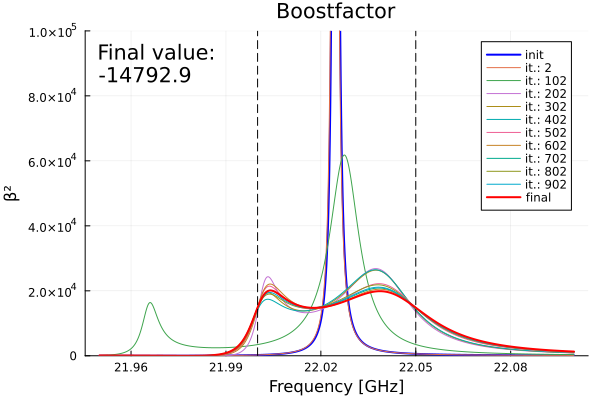

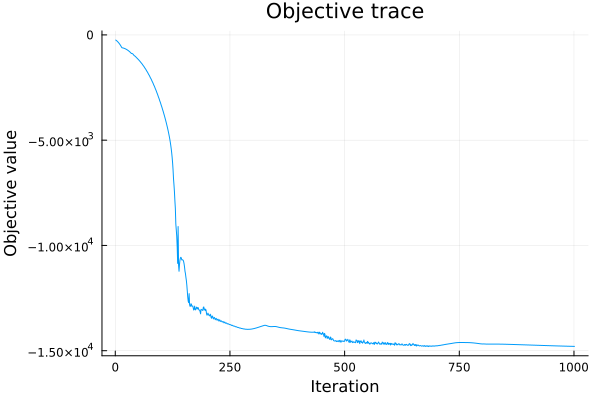

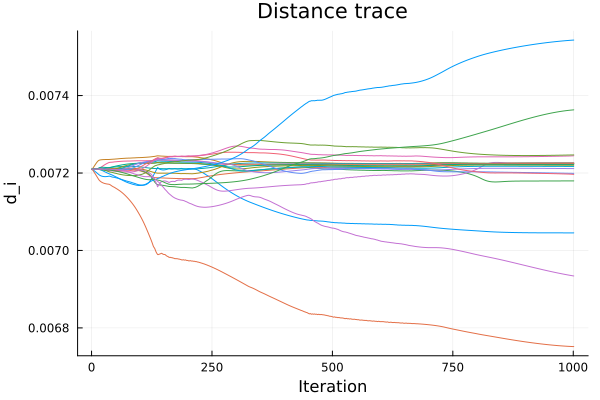

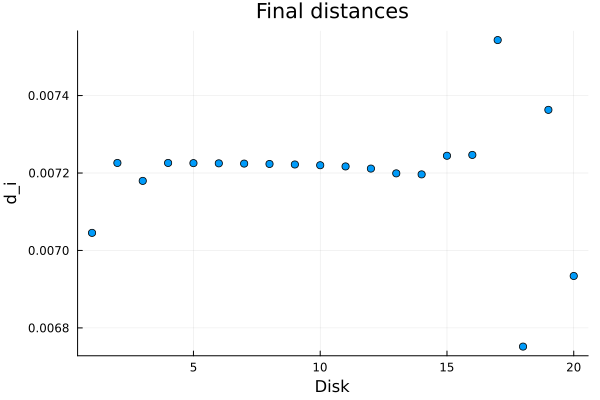

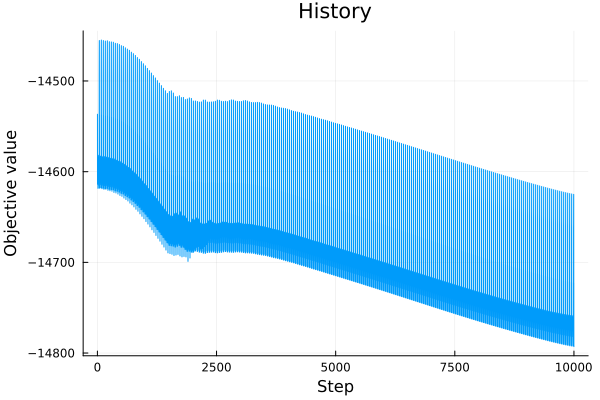

(Plot{Plots.GRBackend() n=13}, Plot{Plots.GRBackend() n=1}, Plot{Plots.GRBackend() n=20}, Plot{Plots.GRBackend() n=1}, Plot{Plots.GRBackend() n=1})

In [5]:
# get handy output
plt = analyse(booster,hist,trace,freqsplot; freqs=freqs,div=10,ylim=[0,100e3])

# savefig(plt[i],"cool_epic_result_wow.svg")